# Perform the simulations from 'Investigating the impact of local manipulations on spontaneous and evoked brain complexity indices: A large-scale computational model' by Gaglioti G., Nieus T., Massimini M., & Sarasso S., (2024).

In [1]:
from tvb.simulator.lab import *
import numpy as np
import pylab as plt
from func_TVB import *
from func_FR import *

We load the two connectomes used for the simulations.

In [10]:
path_base = os.getcwd()

path_Dconn = os.path.join(path_base, 'data', 'connectivity', 'Dconn.zip' )
Dconn = connectivity.Connectivity.from_file(path_Dconn)
Dconn.configure()
W_Dconn=np.copy(Dconn.weights)

path_Hconn = os.path.join(path_base, 'data', 'connectivity', 'Hconn.zip' )
Hconn = connectivity.Connectivity.from_file(path_Hconn)
Hconn.configure()
W_Hconn=np.copy(Hconn.weights)

WARNING  File 'hemispheres' not found in ZIP.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 435, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] Impossibile accedere al file. Il file è utilizzato da un altro processo: 'C:\\Users\\gagli\\TVB\\logs\\library.log' -> 'C:\\Users\\gagli\\TVB\\logs\\library.log.2024-01-07'
Call stack:
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\gagli\Desktop\TVB_Dis

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 435, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] Impossibile accedere al file. Il file è utilizzato da un altro processo: 'C:\\Users\\gagli\\TVB\\logs\\library.log' -> 'C:\\Users\\gagli\\TVB\\logs\\library.log.2024-01-07'
Call stack:
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\gagli\Desktop\TVB_Dis

In [3]:
# set the optimal global coupling for the two connectomes.
G_Dconn=4.
Dconn.weights=W_Dconn*G_Dconn

G_Hconn=3.
Hconn.weights=W_Hconn*G_Hconn

We define the local manipulations (see notebook stimulation_&_manipulation_protocol.ipynb) and the parameters to implement the silencing of nodes.

In [4]:
local_manipulations = np.array([[          ], # control condition
                                [14, 16, 15],
                                [17, 18, 27],
                                [30, 33, 31],
                                [36, 35, 5],
                                [ 6, 21,  2],
                                [ 3,  4,  5], 
                                [12, 28, 25],
                                [15, 14,  4],
                                [19, 3, 20],
                                [ 0,  1, 29],
                                [ 2, 24,  6],
                                [ 9, 24, 34],
                                [22, 20, 19],
                                [23,  8, 27],
                                [32,  2, 21],
                                [ 3, 19, 18],
                                [11, 33, 29],
                                [28, 12, 16],
                                [18, 3, 17],
                                [34, 24, 31]], dtype='object')

manip_params=dict(ane=0, ani=0.6)

# Spontaneous Activity

The following code performs the simulation of spontaneous activity (4000 s) for all conditions (control and local manipulations). The outputs are stored in a dictionary (IFR_spontaneous). The simulation is quite long, and it can be shortened by reducing t_end. Additionally, you can download the complete 'IFR_spontaneous.npy' dictionary at https://unimi2013-my.sharepoint.com/personal/gianluca_gaglioti_unimi_it/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fgianluca%5Fgaglioti%5Funimi%5Fit%2FDocuments%2Foutputs&ga=1. After downloading, place it in the 'path_outputs' directory ('.../data/outputs').

In [6]:
IFR_spontaneous = {}

for e, manip_nodes in enumerate(local_manipulations):
    t_start = 3000
    t_end = 4e6 + t_start

    _, _, data_V, _, _ = run_sim(params=LB_DconnParams(), conn=Dconn, 
                                manipulated_nodes=manip_nodes, manipulation_params=manip_params,
                                stim_amp = 0, # spontaneous activity
                                sim_length=t_end)
    data_V = data_V[t_start:]
      
    #IFR
    time = np.arange(len(data_V))
    IFR, _ = calc_firing(data_V, time=time, bin_size=25, start=0, trial=0, stim_onset=0, end=len(data_V), sliding=True, step=10)
    key = 'control' if e == 0 else f'L{e}'
    IFR_spontaneous.update({key:IFR})
    del data_V
    del IFR
    
    sys.stdout.write(f'\r{e+1}' + ' of ' + str(len(local_manipulations)))
    sys.stdout.flush()

21 of 21

In [5]:
path_outputs = os.path.join(path_base, 'data', 'outputs')
#np.save(os.path.join(path_outputs, 'IFR_spontaneous'), IFR_spontaneous, allow_pickle=1)
IFR_spontaneous = np.load(os.path.join(path_outputs, 'IFR_spontaneous.npy'), allow_pickle=1).item()

# Evoked activity

We load the dictionary containing each combination of stimulation and local manipulation

In [5]:
path_stim_manip = os.path.join(path_base, 'data', 'stim_manip')
Dconn_stim_manip_dict = np.load(os.path.join(path_stim_manip, 'Dconn_stim_manip_dict.npy'), allow_pickle=True).item()

We define the function to perform evoked activity simulations. The code first initiates the simulation with TVB, iterating for n number of trials, and then transforms the output (mean membrane potential) into instantaneous firing rate (IFR).

In [6]:
def run_evoked(conn, params, stim_node, ntrials=500, 
               manipulated_nodes=[], manipulation_params=[], fit_nodes=[], fit_params=[],
               stim_amp=1, stim_tau=5, pre=1000, post=1000, stimulus_jitter=[3000,5000]):
    
    V_trials = []
    for trial in range(ntrials):
        stim_onset = np.random.randint(stimulus_jitter[0], stimulus_jitter[1])
        sim_start = stim_onset - pre
        sim_end = stim_onset + post 

        _, _, data_V, _, _ = run_sim(conn=conn, params=params,
                                     manipulated_nodes=manipulated_nodes, manipulation_params=manipulation_params,
                                     fit_nodes=fit_nodes, fit_params=fit_params,
                                     stim_amp = stim_amp, stim_onset=stim_onset, stim_tau=stim_tau, stim_node=[stim_node], stim_T=50000, 
                                     sim_length=sim_end)
        data_V = data_V[sim_start:,:]
        V_trials.append([data_V])
        sys.stdout.write('\rTrial: ' + str(trial+1) + ' of ' + str(ntrials))
        sys.stdout.flush()
        
    time = np.arange(-pre,post)
    V_trials = np.squeeze(V_trials)
    IFR_trials, TimeBins = calc_firing_trials(V_trials, time, bin_size=25, start=0, end=pre+post, stim_onset=pre, conn=conn.weights, sliding=True, step=10)
    
    return IFR_trials, TimeBins

The following code performs the simulation of the evoked activity (500 trials) for three conditions (control, L4 and L17) with rPCi stimulation. For each trial, 1 s pre-stimulus and 1 s post-stimulus are stored. The outputs are then stored in a dictionary (IFR_evoked). The simulation of all combinations, i.e., 12 stimulation sites x 21 conditions (control + 20 local manipulations), is computationally intensive. You can download the complete 'IFR_evoked.npy' dictionary at https://unimi2013-my.sharepoint.com/personal/gianluca_gaglioti_unimi_it/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fgianluca%5Fgaglioti%5Funimi%5Fit%2FDocuments%2Foutputs&ga=1. After downloading, place it in the 'path_outputs' directory ('.../data/outputs').

In [8]:
stimulated_nodes = list(Dconn_stim_manip_dict.keys())
stim_node = stimulated_nodes[1]
print('stimulated node:', Dconn.region_labels[stim_node])

IFR_evoked = {}
for condition in [0, 4, 17]:
    manip_nodes = Dconn_stim_manip_dict[stim_node][condition]
    cond_name = 'control' if condition==0 else f'L{condition}'
    print('\ncondition:', cond_name)
    
    # run the simulations
    IFR_trials, t = run_evoked(Dconn, LB_DconnParams(), stim_node, ntrials=500, 
                               manipulated_nodes=manip_nodes, manipulation_params=manip_params, 
                               pre=1000, post=1000, stimulus_jitter=[3000,5000]) 
    # store the results
    IFR_evoked.update({cond_name:IFR_trials})

stimulated node: rPCI

condition: control
Trial: 50 of 50
condition: L4
Trial: 50 of 50
condition: L17
Trial: 50 of 50

In [120]:
path_outputs = os.path.join(path_base, 'data', 'outputs')
#np.save(os.path.join(path_outputs, 'IFR_evoked'), IFR_evoked, allow_pickle=1)
IFR_evoked = np.load(os.path.join(path_outputs, 'IFR_evoked.npy'), allow_pickle=True).item()[stim_node]

Test the output

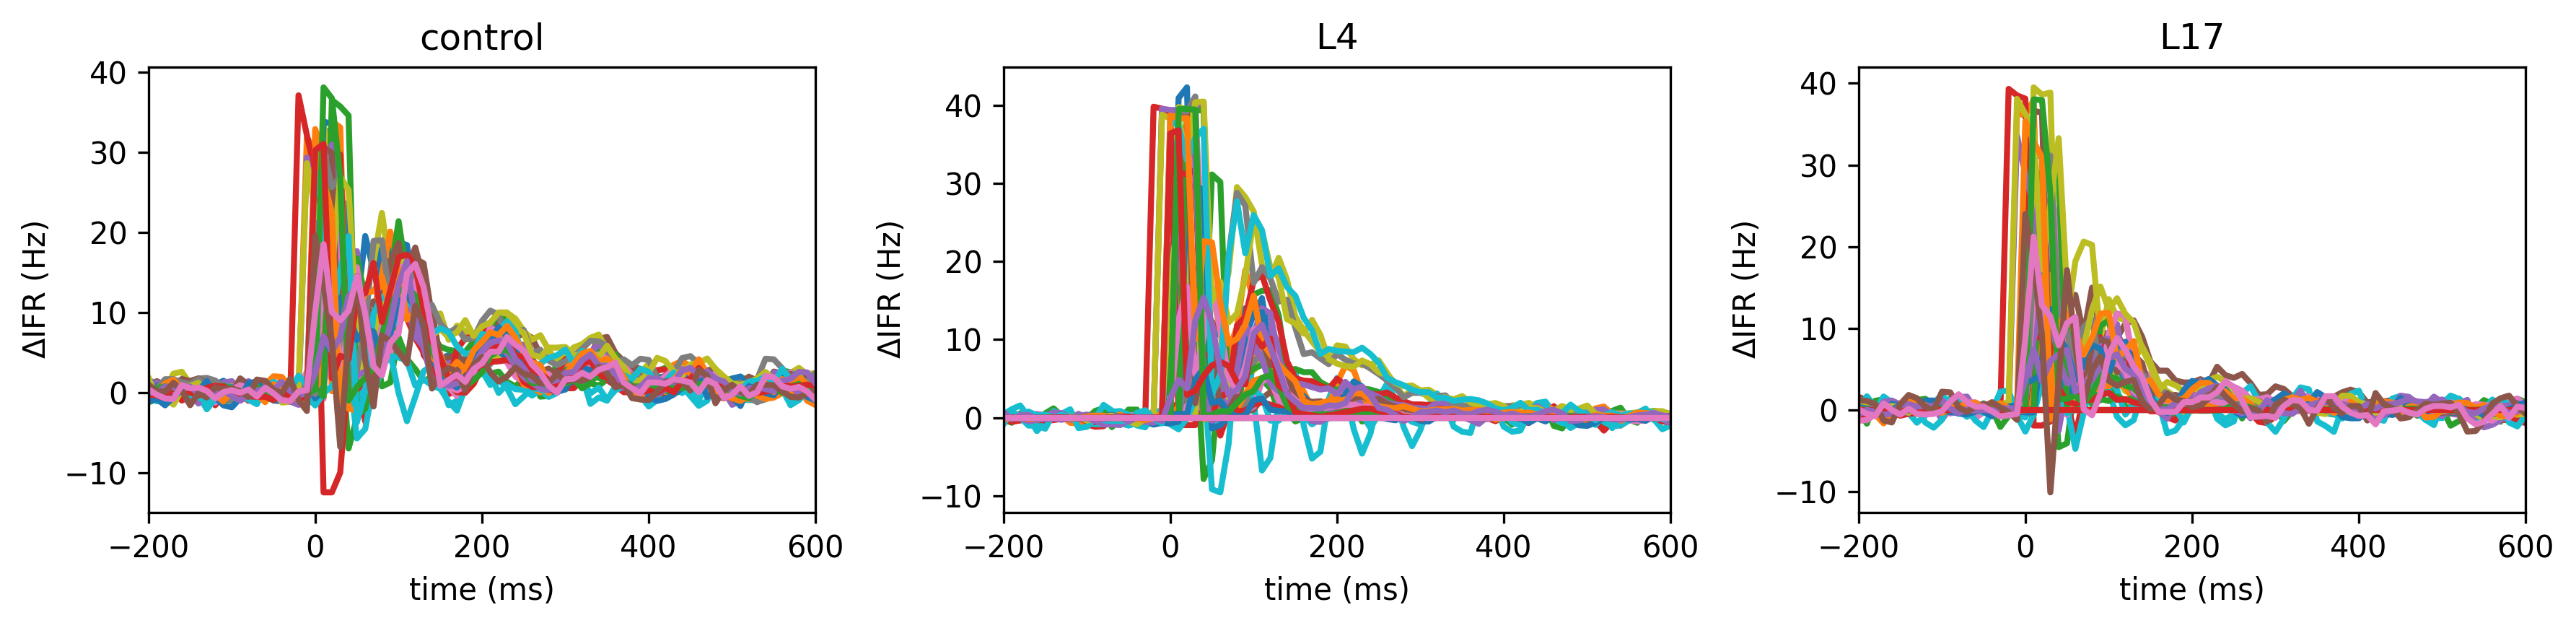

In [147]:
bin_size=25
step=10
t = np.arange(-1000,1000-bin_size,step=10)
t_pre = np.where(t<0)[0][-1]
control_evk = IFR_evoked['control'].mean(axis=0).T - IFR_evoked['control'].mean(axis=0)[:,:t_pre].mean(axis=1)
L4_evk = IFR_evoked['L4'].mean(axis=0).T - IFR_evoked['L4'].mean(axis=0)[:,:t_pre].mean(axis=1)
L17_evk = IFR_evoked['L17'].mean(axis=0).T - IFR_evoked['L17'].mean(axis=0)[:,:t_pre].mean(axis=1)
r_hem = np.arange(37)

plt.figure(dpi=300, figsize=(12,3))

plt.subplot(131)
plt.plot(t, control_evk[:,r_hem], lw=2);
plt.xlim(-200,600)
plt.xlabel('time (ms)')
plt.ylabel(r'$\Delta$IFR (Hz)')
plt.title('control')

plt.subplot(132)
plt.plot(t, L4_evk[:,r_hem], lw=2);
plt.xlim(-200,600)
plt.xlabel('time (ms)')
plt.ylabel(r'$\Delta$IFR (Hz)')
plt.title('L4')

plt.subplot(133)
plt.plot(t, L17_evk[:,r_hem], lw=2);
plt.xlim(-200,600)
plt.xlabel('time (ms)')
plt.ylabel(r'$\Delta$IFR (Hz)')
plt.title('L17')

plt.tight_layout()

## Hconn

We simulate the evoked activty in Hconn. First, we load the local manipulations dictionary and then run the simulations. You can download the complete output at https://unimi2013-my.sharepoint.com/:f:/g/personal/gianluca_gaglioti_unimi_it/Emts0WKNp4JPqszO8tDhCpgBl3iUNQ-OYujYLHshoKkn4g?e=htjQfi. The IFR of Hconn is stored in a folder (Hconn), after downloading, the entire folder should be placed in the 'path_outputs' directory ('.../data/outputs'). To load the IFR of Hconn, refer to the notebook "figures.ipynb".

In [11]:
path_stim_manip = os.path.join(path_base, 'data', 'stim_manip')
Hconn_stim_manip_dict = np.load(os.path.join(path_stim_manip, 'Hconn_stim_manip_dict.npy'), allow_pickle=True).item()

In [20]:
stim_node = Hconn_stim_manip_dict['stim']
print('stimulated nodes:', Hconn.region_labels[stim_node])

# Since the left hemisphere (nodes[500:998]) is slightly unbalanced in terms of weights, resulting in an MFR about twice as high as the right, we slightly increase the nonspecific inhibition (ani) there to fit the MFR of the two hemispheres.
fit_nodes=np.arange(500,Hconn.number_of_regions)
fit_params=dict(ani=0.4023)

Hconn_IFR_evoked = {}
for condition in [0, 1, 7]:
    manip_nodes = Hconn_stim_manip_dict['manip'][condition]
    cond_name = 'control' if condition==0 else f'HL{condition}'
    print('\ncondition:', cond_name)
    
    # run the simulations
    IFR_trials, t = run_evoked(Hconn, LB_HconnParams(), stim_node, ntrials=2, 
                               manipulated_nodes=manip_nodes, manipulation_params=manip_params, 
                               fit_nodes=fit_nodes, fit_params=fit_params,
                               pre=500, post=500, stimulus_jitter=[14000,16000]) 
    # store the results
    Hconn_IFR_evoked.update({cond_name:IFR_trials})

stimulated node: ['rSP' 'rSP' 'rSP' 'rSP' 'rSP' 'rSP' 'rSP' 'rSP' 'rSP' 'rSP' 'rSP' 'rPCUN'
 'rSP' 'rPCUN']

condition: control
Trial: 2 of 2
condition: HL1
Trial: 2 of 2
condition: HL7
Trial: 2 of 2